In [27]:
from astropy import wcs
from astropy import units as u
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord

%matplotlib inline

%autocall 1
from pylab import *
import makemySDSSlibv2 as makemySDSS
import pylab as pl
import pyfits
from astLib import astWCS, astImages
import pyff


Automatic calling is: Smart


In [28]:
frame    = pyfits.getdata('frame-g-001737-6-0011.fits')
framewcs = wcs.WCS('frame-g-001737-6-0011.fits')

objid, ra,dec, run,rerun,camcol,field, Rp = 1237652936176894483,309.097804246745,-4.61874142891258,1737,301,6,11,32.53249

SIZERP = 5.
SZdeg  = float(2.*SIZERP * Rp / 3600.)

In [29]:
pixcrd = array([[0, 0], [24, 38], [45, 98]], float_)
objradec = array([[ra,dec]], float_)
world1 = framewcs.wcs_world2pix(objradec, 0)
world2 = framewcs.all_world2pix(objradec, 0)
world1,world2

(array([[ 1707.31052321,   971.04273483]]),
 array([[ 1707.31052321,   971.04273483]]))

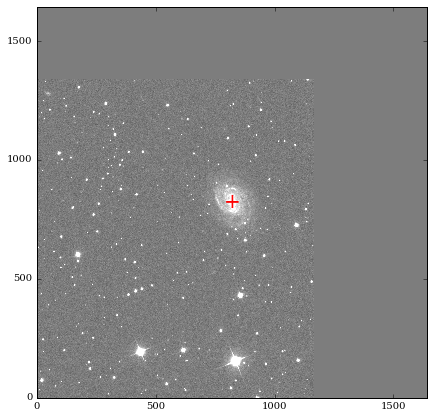

In [38]:
position = SkyCoord(ra*u.deg, dec*u.deg)
cutout = Cutout2D(frame, position, (4*SIZERP* Rp/0.396, 4*SIZERP*Rp/0.396), wcs=framewcs, mode='partial', fill_value=(median(frame)))

figure(figsize=(7,7))
pyff.imshow(arcsinh( cutout.data))
x,y = cutout.wcs.wcs_world2pix(ra,dec,0)
text(x,y,'+', fontsize=20, horizontalalignment='center', verticalalignment='center', color='r')
x,y
gray()
pyfits.writeto('stamptest.fits', cutout.data)

In [31]:
cutout.wcs.wcs_world2pix(ra,dec,0)

[array(821.3105232127359), array(821.0427348336747)]

In [9]:
pyff.imshow(frame)
cutout.plot_on_original(color='white')


In [10]:
from astropy.wcs.utils import pixel_to_skycoord

In [11]:
pixel_to_skycoord(821,821, cutout.wcs)

<SkyCoord (ICRS): (ra, dec) in deg
    (309.09779465, -4.61877454)>

In [12]:
cutout.wcs.get_axis_types()

[{u'coordinate_type': u'celestial',
  u'group': 0,
  u'number': 0,
  u'scale': u'non-linear celestial'},
 {u'coordinate_type': u'celestial',
  u'group': 0,
  u'number': 1,
  u'scale': u'non-linear celestial'}]

In [13]:

print cutout.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 309.06215906099999  -4.6894974830300002  
CRPIX : 139.0  595.0  
CD1_1 CD1_2  : 1.58368222668e-05  0.000108825308268  
CD2_1 CD2_2  : 0.00010880279759699999  -1.58159494688e-05  
NAXIS    : 2048 1489
